# CNN From Scratch In Python! 
This notebook is used for training of the model.

### Importing the required libararies

In [1]:
from dataset import mnist
from conv import ConvolutionLayer
from maxpool import MaxPoolingLayer
from activations import Softmax
from training import CNN_train, CNN_test, CNN_predict

import numpy as np
import matplotlib.pyplot as plt

### Retrieveing the dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.getData()

### Defining the layers of our CNN architecture

In [3]:
layers = [
    ConvolutionLayer(1, 3),
    MaxPoolingLayer(2),
    Softmax(13*13*1, 10)
]

### Training the CNN model
Now that we have defined the layers in our model, we will now train the models on the test data we got from the test train split function.

In [4]:
for epoch in range(10):
    print('Epoch {} ->'.format(epoch+1))
    # Training the CNN
    loss = 0
    accuracy = 0
    for i, (image, label) in enumerate(zip(X_train[0:10000], Y_train[0:10000])):
      if i % 1000 == 0: # Every 1000 examples
        print("Step {}. For the last 1000 steps: average loss {}, accuracy {}".format(i+1, loss/100, accuracy))
        loss = 0
        accuracy = 0
      loss_1, accuracy_1 = CNN_train(image, label, layers)
      loss += loss_1
      accuracy += accuracy_1
      # break the for loop if the models loss is less than 0.5
      if(loss == 0.05):
        print("Step {}. For the last 1000 steps: average loss {}, accuracy {}".format(i+1, loss/100, accuracy))
        break

Epoch 1 ->
Step 1. For the last 1000 steps: average loss 0.0, accuracy 0
Step 1001. For the last 1000 steps: average loss 23.146727054002234, accuracy 102
Step 2001. For the last 1000 steps: average loss 23.167831809034066, accuracy 101
Step 3001. For the last 1000 steps: average loss 23.153170402735142, accuracy 101
Step 4001. For the last 1000 steps: average loss 23.17185051997663, accuracy 85
Step 5001. For the last 1000 steps: average loss 23.146806974462482, accuracy 104
Step 6001. For the last 1000 steps: average loss 23.12797803677623, accuracy 95
Step 7001. For the last 1000 steps: average loss 23.171098676221096, accuracy 85
Step 8001. For the last 1000 steps: average loss 23.107260807802035, accuracy 100
Step 9001. For the last 1000 steps: average loss 22.996907853822485, accuracy 120
Epoch 2 ->
Step 1. For the last 1000 steps: average loss 0.0, accuracy 0
Step 1001. For the last 1000 steps: average loss 22.839638964715128, accuracy 156
Step 2001. For the last 1000 steps: ave

### Testing our model
Here we will test how our CNN model performs against the test data from the test train split.

In [5]:
loss = 0
accuracy = 0
for i, (image, label) in enumerate(zip(X_test[0:10000], Y_test[0:10000])):
  if i % 1000 == 0: # Every 1000 examples
    print("Step {}. For the last 1000 steps: average loss {}, accuracy {}".format(i+1, loss/100, accuracy))
    loss = 0
    accuracy = 0
  loss_1, accuracy_1 = CNN_test(image, label, layers)
  loss += loss_1
  accuracy += accuracy_1

Step 1. For the last 1000 steps: average loss 0.0, accuracy 0
Step 1001. For the last 1000 steps: average loss 3.6151135831927435, accuracy 887
Step 2001. For the last 1000 steps: average loss 4.50354909748911, accuracy 863
Step 3001. For the last 1000 steps: average loss 4.336396146384858, accuracy 876
Step 4001. For the last 1000 steps: average loss 4.145799733869785, accuracy 882
Step 5001. For the last 1000 steps: average loss 3.951127503596536, accuracy 894
Step 6001. For the last 1000 steps: average loss 2.2303354536766933, accuracy 933
Step 7001. For the last 1000 steps: average loss 3.08811191838809, accuracy 910
Step 8001. For the last 1000 steps: average loss 2.3585601279678117, accuracy 932
Step 9001. For the last 1000 steps: average loss 1.271532498637427, accuracy 967


### Visualizing the predicitons

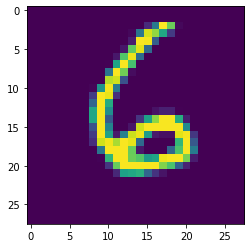

In [12]:
test_img = X_test[600]
plt.imshow(test_img)

In [13]:
cnn_prediction = CNN_predict(test_img, layers)
print("The models prediction: " + str(cnn_prediction))

The models prediction: 6
